# Proyek Akhir: Menyelesaikan Permasalahan Jaya Jaya Institut


*   Nama: Muhammad Erlangga Prasetya
*   Email: 2110631170078@student.unsika.ac.id
*   ID Dicoding: erlanggs


In [2]:
# Import Libraries

import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import collections
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay


# Data Preparation

In [3]:
df = pd.read_csv('data.csv', delimiter=';')

In [4]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [6]:
#
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [7]:
#
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [8]:
# Melakukan pengecekan mengenai duplikasi data
df.duplicated().sum()

np.int64(0)

In [9]:
# Melakukan pengecekan mengenai distrubusi setiap variabel pada atribut target "Status"
status_counts = df['Status'].value_counts(dropna=False)
print(status_counts)

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [10]:
# Melakukan pengecekan mengenai atribut yang memiliki variabel unik
df.nunique()

,0
Marital_status,6
Application_mode,18
Application_order,8
Course,17
Daytime_evening_attendance,2
Previous_qualification,17
Previous_qualification_grade,101
Nacionality,21
Mothers_qualification,29
Fathers_qualification,34


# Exploratory Data Analysis (EDA)

In [11]:
#
def label_decoding(df, feature):
    """
    Mengubah fitur yang telah dienkode dalam DataFrame ke label kategori yang sesuai.

    Parameter:
        df (pandas.DataFrame): DataFrame yang berisi fitur yang akan diubah.
        feature (str atau list of str): Nama fitur atau daftar fitur yang akan diubah.

    Mengembalikan:
        pandas.DataFrame: DataFrame dengan fitur yang sudah diubah menjadi label kategori.
    """

    # Mendefinisikan pemetaan kategori dalam dictionary
    category_mappings = {
        'Marital_status': {1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced', 5: 'Facto Union', 6: 'Legally Separated'},
        'Daytime_evening_attendance': {0: 'Evening', 1: 'Daytime'},
        'Gender': {0: 'Female', 1: 'Male'},
        'Application_mode': {
            1: '1st Phase - General Contingent', 2: 'Ordinance No. 612/93', 5: '1st Phase - Special Contingent (Azores Island)',
            7: 'Holders of Other Higher Courses', 10: 'Ordinance No. 854-B/99', 15: 'International Student (Bachelor)', 16: '1st Phase - Special Contingent (Madeira Island)',
            17: '2nd Phase - General Contingent', 18: '3rd Phase - General Contingent', 26: 'Ordinance No. 533-A/99, Item B2 (Different Plan)',
            27: 'Ordinance No. 533-A/99, Item B3 (Other Institution)', 39: 'Over 23 Years Old', 42: 'Transfer', 43: 'Change of Course',
            44: 'Technological Specialization Diploma Holders', 51: 'Change of Institution/Course', 53: 'Short Cycle Diploma Holders',
            57: 'Change of Institution/Course (International)'
        },
        'Course': {
            33: 'Biofuel Production Technologies', 171: 'Animation and Multimedia Design', 8014: 'Social Service (Evening Attendance)',
            9003: 'Agronomy', 9070: 'Communication Design', 9085: 'Veterinary Nursing', 9119: 'Informatics Engineering', 9130: 'Equinculture',
            9147: 'Management', 9238: 'Social Service', 9254: 'Tourism', 9500: 'Nursing', 9556: 'Oral Hygiene', 9670: 'Advertising and Marketing Management',
            9773: 'Journalism and Communication', 9853: 'Basic Education', 9991: 'Management (Evening Attendance)'
        },
        'Nacionality': {
            1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian', 13: 'Dutch', 14: 'English', 17: 'Lithuanian', 21: 'Angolan',
            22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican', 26: 'Santomean', 32: 'Turkish', 41: 'Brazilian', 62: 'Romanian',
            100: 'Moldova (Republic of)', 101: 'Mexican', 103: 'Ukrainian', 105: 'Russian', 108: 'Cuban', 109: 'Colombian'
        },
        'Qualification': {
            1: 'Secondary Education - 12th Year of Schooling or Eq.', 2: "Higher Education - Bachelor's Degree", 3: 'Higher Education - Degree',
            4: "Higher Education - Master's", 5: 'Higher Education - Doctorate', 6: 'Frequency of Higher Education', 9: '12th Year of Schooling - Not Completed',
            10: '11th Year of Schooling - Not Completed', 11: '7th Year (Old)', 12: 'Other - 11th Year of Schooling', 13: '2nd Year Complementary High School Course',
            14: '10th Year of Schooling', 15: '10th Year of Schooling - Not Completed', 18: 'General Commerce Course', 19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
            20: 'Complementary High School Course', 22: 'Technical - Professional Course', 25: 'Complementary High School Course - Not Concluded',
            26: '7th Year of Schooling', 27: '2nd Cycle of the General High School Course', 29: '9th Year of Schooling - Not Completed',
            30: '8th Year of Schooling', 31: 'General Course of Administration and Commerce', 33: 'Supplementary Accounting and Administration', 34: 'Unknown',
            35: "Can't Read or Write", 36: 'Can Read Without Having a 4th Year of Schooling', 37: 'Basic Education 1st Cycle (4th/5th Year) or Equiv.',
            38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.', 39: 'Technological Specialization Course', 40: 'Higher Education - Degree (1st Cycle)',
            41: 'Specialized Higher Studies Course', 42: 'Professional Higher Technical Course', 43: 'Higher Education - Master (2nd Cycle)', 44: 'Higher Education - Doctorate (3rd Cycle)'
        },
        'Occupation': {
            0: 'Student', 1: 'Representatives of the Legislative Power and Executive Bodies', 2: 'Specialists in Intellectual and Scientific Activities',
            3: 'Intermediate Level Technicians and Professions', 4: 'Administrative Staff', 5: 'Personal Services, Security and Safety Workers and Sellers',
            6: 'Farmers and Skilled Workers in Agriculture', 7: 'Skilled Workers in Industry', 8: 'Installation and Machine Operators', 9: 'Unskilled Workers',
            10: 'Armed Forces Professions', 90: 'Other Situation', 99: '(Blank)', 101: 'Armed Forces Officers', 102: 'Armed Forces Sergeants',
            103: 'Other Armed Forces Personnel', 112: 'Directors of Administrative and Commercial Services', 114: 'Hotel, Catering, Trade Directors',
            121: 'Specialists in the Physical Sciences', 122: 'Health Professionals', 123: 'Teachers', 124: 'Finance and Accounting Specialists'
        }
    }

    # Memperbarui beberapa fitur agar tidak ada pengulangan kode
    category_mappings['Previous_qualification'] = category_mappings['Qualification']
    category_mappings['Mothers_qualification'] = category_mappings['Qualification']
    category_mappings['Fathers_qualification'] = category_mappings['Qualification']
    category_mappings['Mothers_occupation'] = category_mappings['Occupation']
    category_mappings['Fathers_occupation'] = category_mappings['Occupation']

    # Pemetaan untuk fitur biner
    binary_features = ['Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'International']
    binary_mapping = {0: 'No', 1: 'Yes'}

    # Memastikan 'feature' selalu berupa list untuk konsistensi
    features = [feature] if isinstance(feature, str) else feature

    # Menerapkan pemetaan pada fitur yang relevan
    for f in features:
        if f in category_mappings:
            df[f] = df[f].map(category_mappings[f])
        elif f in binary_features:
            df[f] = df[f].map(binary_mapping)

    return df


In [12]:
# Membuat salinan DataFrame untuk eksplorasi
df_eda = df.copy()

categorical_cols = ['Status','Gender', 'Scholarship_holder', 'Debtor', 'Tuition_fees_up_to_date']
numerical_cols = ['Age_at_enrollment', 'Admission_grade', 'Curricular_units_1st_sem_grade',
                  'Unemployment_rate', 'Inflation_rate', 'GDP']

# Daftar fitur yang akan didekode
features_to_decode = [
    'Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance',
    'Previous_qualification', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification',
    'Mothers_occupation', 'Fathers_occupation', 'Displaced', 'Educational_special_needs',
    'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International'
]

In [13]:
# Menerapkan label decoding pada semua fitur sekaligus
df_eda = label_decoding(df_eda, features_to_decode)

# Menampilkan DataFrame yang telah didekode
df_eda

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd Phase - General Contingent,5,Animation and Multimedia Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International Student (Bachelor),1,Tourism,Daytime,Secondary Education - 12th Year of Schooling o...,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st Phase - General Contingent,5,Communication Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd Phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 Years Old,1,Social Service (Evening Attendance),Evening,Secondary Education - 12th Year of Schooling o...,100.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st Phase - General Contingent,6,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,Single,1st Phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,Single,1st Phase - General Contingent,1,Nursing,Daytime,Secondary Education - 12th Year of Schooling o...,154.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,Single,1st Phase - General Contingent,1,Management,Daytime,Secondary Education - 12th Year of Schooling o...,180.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [14]:
# Dataset for Business Dashboard
df_eda.to_csv('student_data_cleaned.csv', index=False)

# Data Understanding

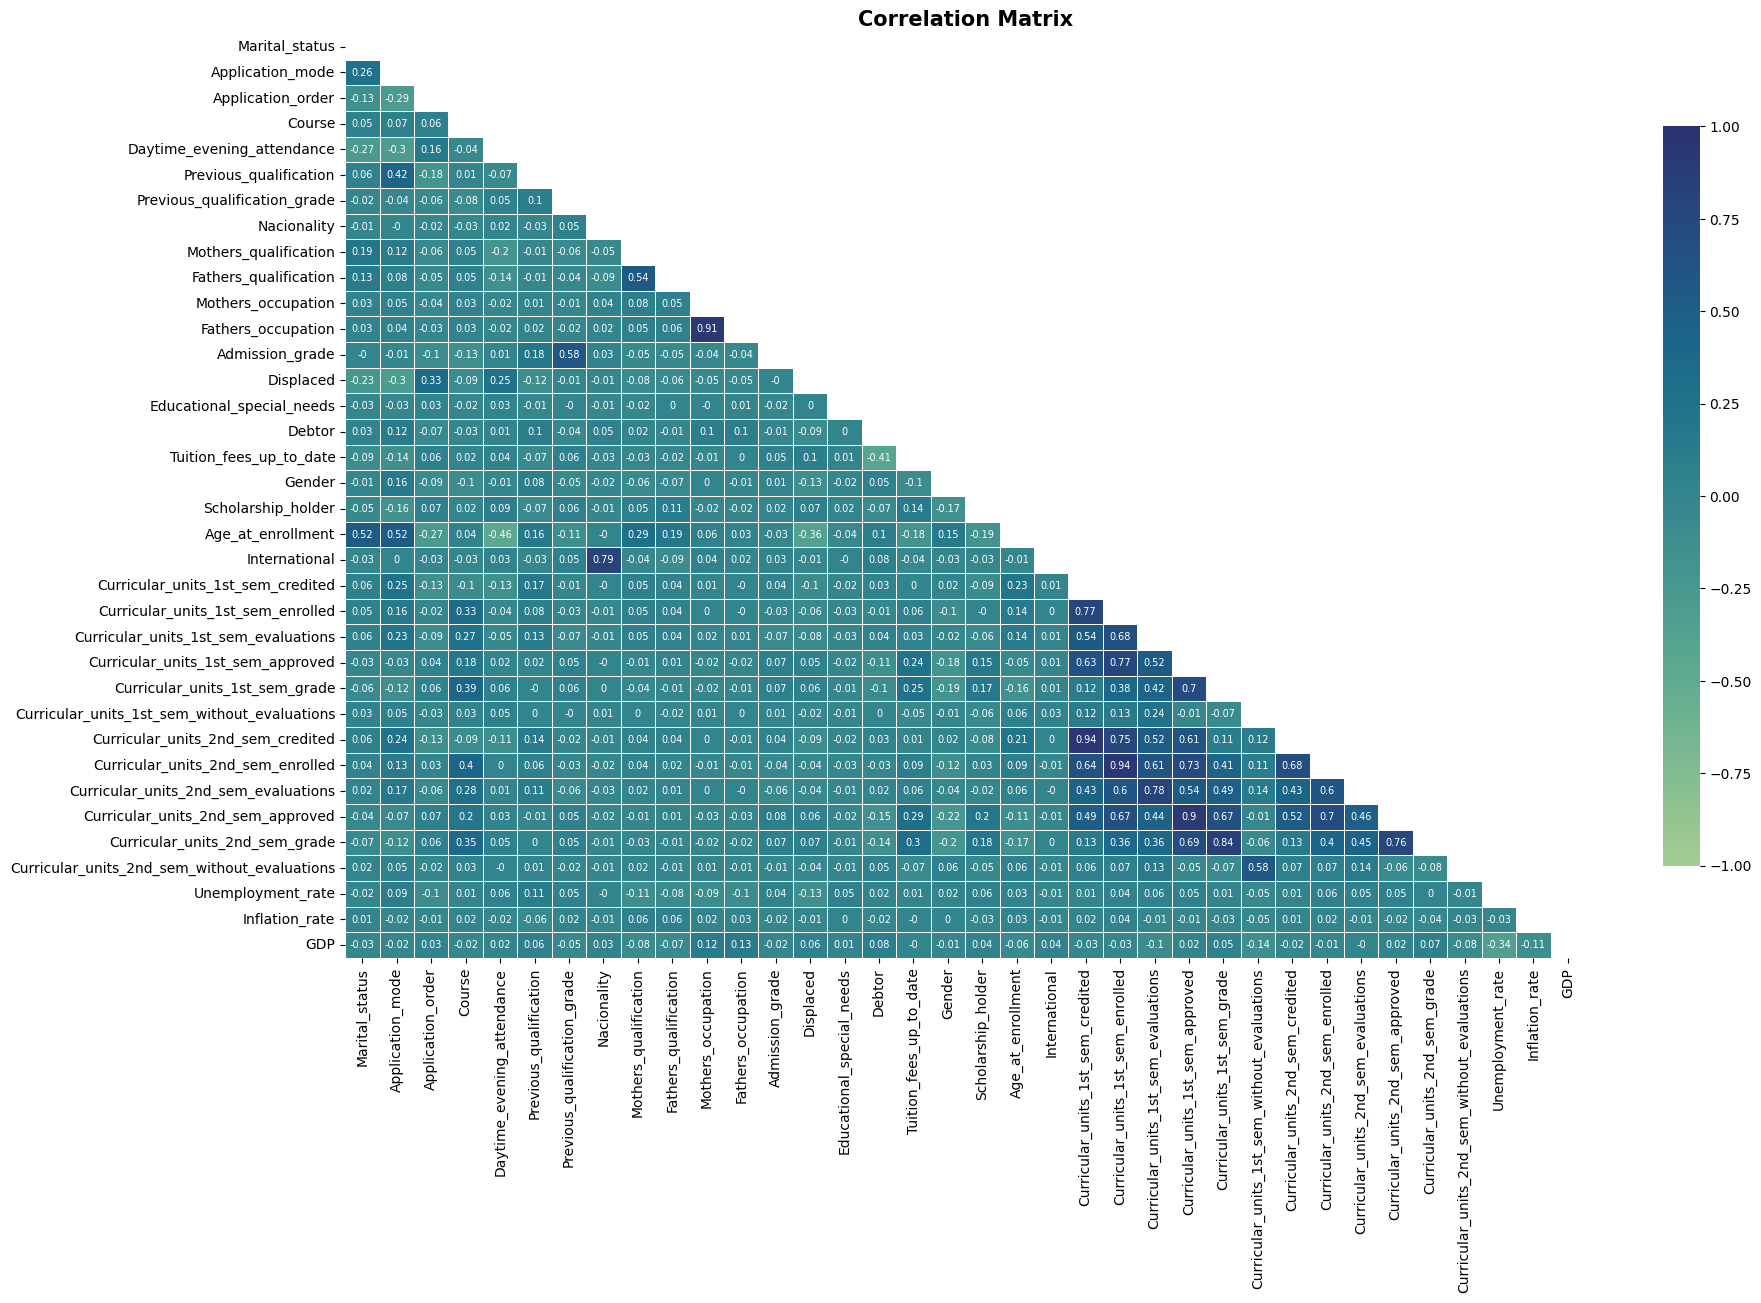

In [15]:
#
plt.figure(figsize=(20, 12))
correlation_matrix = df.corr(numeric_only=True).round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    vmin=-1, vmax=1,
    annot=True,
    cmap='crest',
    mask=mask,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 7}
)

plt.title('Correlation Matrix',fontweight='bold', fontsize=15)
plt.show()

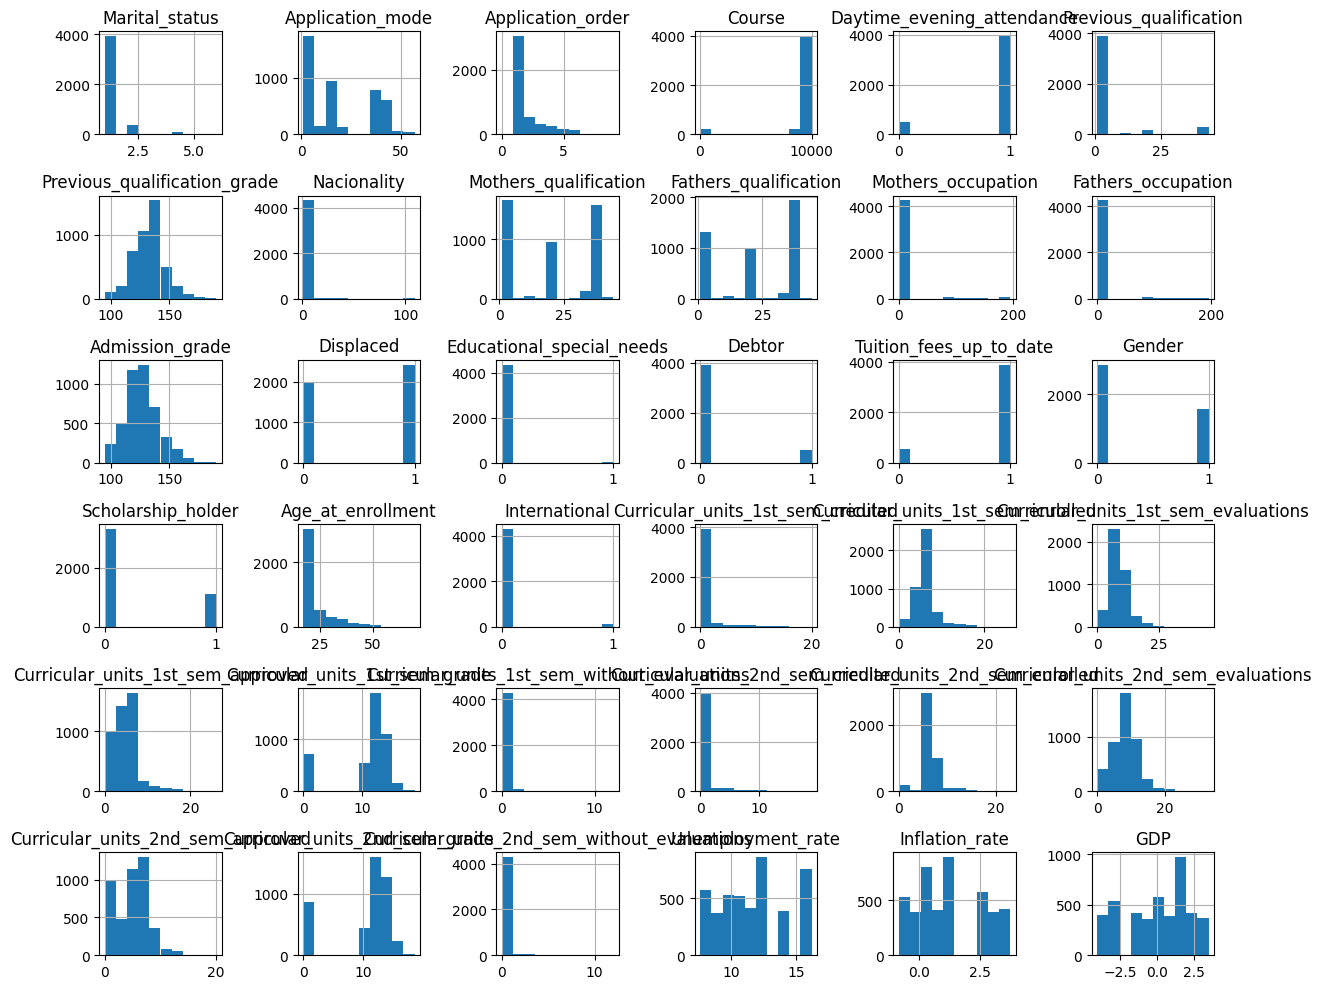

In [16]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [17]:
def count_plot(data, y, hue=None, title='Data', figsize=(8, 4), palette='Set2'):
    """
    Create a countplot with annotations for a given dataset.

    Parameters:
    - data: DataFrame, the dataset to plot.
    - y: str, the column to plot on the y-axis.
    - hue: str, optional, the column for hue categorization.
    - title: str, the title of the plot.
    - figsize: tuple, the size of the figure.
    - palette: str or list, color palette to use.

    Returns:
    - This function does not return any value but displays a countplot.
    """
    plt.figure(figsize=figsize)

    # Tentukan jumlah kategori yang sebenarnya
    if hue:
        n_categories = data[hue].nunique()
        colors = sns.color_palette(palette, n_colors=n_categories)
    else:
        colors = None

    ax = sns.countplot(data=data, y=y, hue=hue,
                      palette=colors if hue else None,
                      order=data[y].value_counts().index)

    plt.title(f'Distribusi {title}', fontweight='bold', fontsize=12)
    plt.grid(axis='x', alpha=0.3)

    if hue:
        plt.legend(title=hue, loc='lower right', frameon=True,
                  fancybox=True, shadow=True)

    max_width = max([bar.get_width() for bar in ax.patches])
    ax.set_xlim(0, max_width * 1.15)

    # Add annotation label to each bar
    for bar in ax.patches:
        if bar.get_width() > 0 and bar.get_height() > 0:
            label = f'{int(bar.get_width())}'
            width = bar.get_width()
            ax.annotate(
                label,
                (width, bar.get_y() + bar.get_height() / 2),
                ha='left', va='center',
                xytext=(3, 0), textcoords='offset points',
                fontsize=10, fontweight='bold'
            )

    plt.tight_layout()
    plt.show()

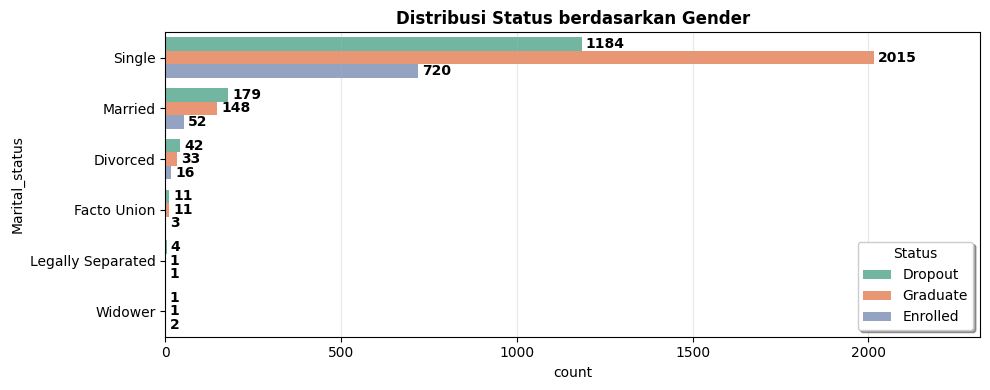

In [18]:
# Plot
count_plot(df_eda, 'Marital_status', 'Status', 'Status berdasarkan Gender', (10, 4), palette='Set2')

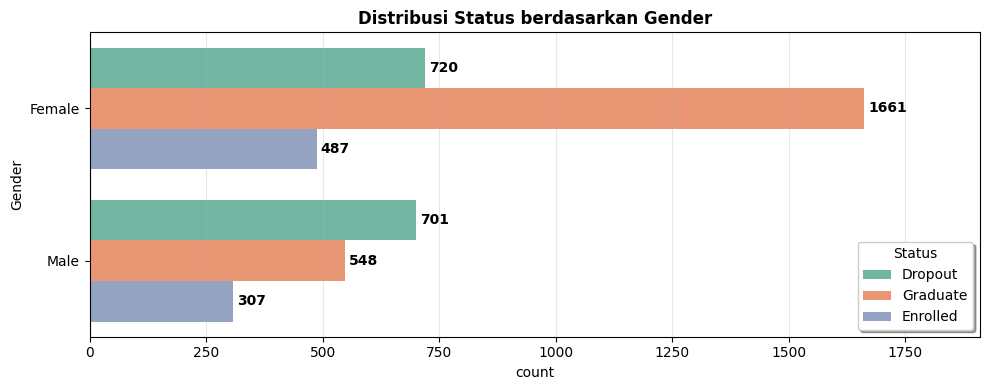

In [19]:
# Plot
count_plot(df_eda, 'Gender', 'Status', 'Status berdasarkan Gender', (10, 4), palette='Set2')

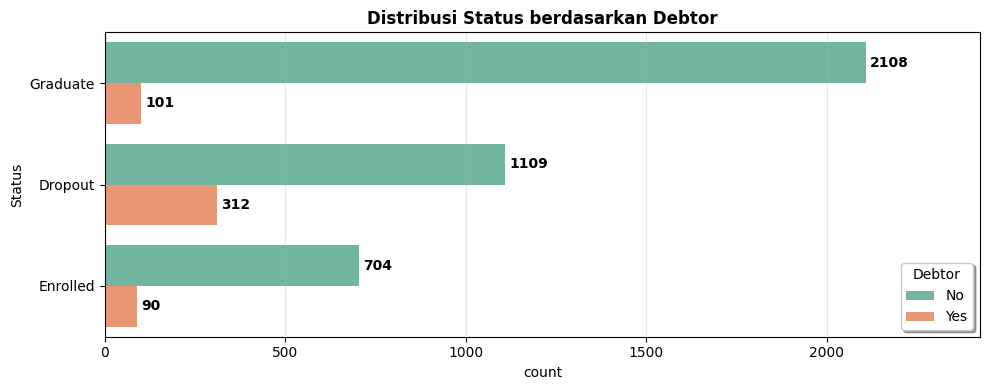

In [20]:
count_plot(df_eda, 'Status', 'Debtor', 'Status berdasarkan Debtor', (10, 4), palette='Set2')

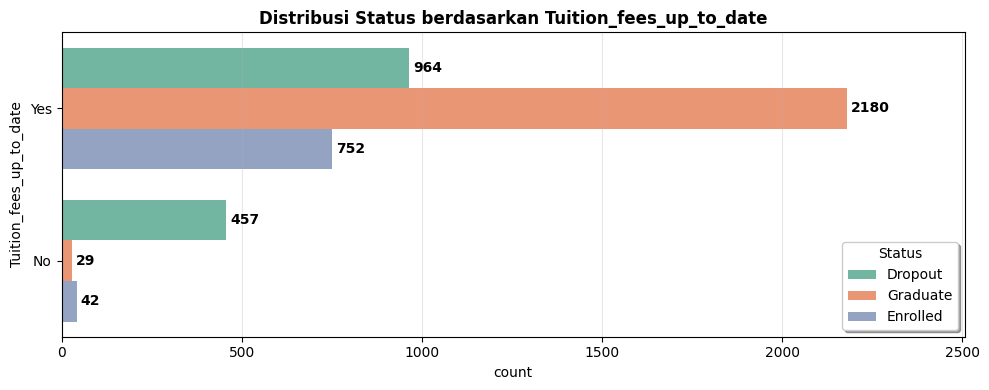

In [21]:
count_plot(df_eda, 'Tuition_fees_up_to_date', 'Status', 'Status berdasarkan Tuition_fees_up_to_date', (10, 4), palette='Set2')

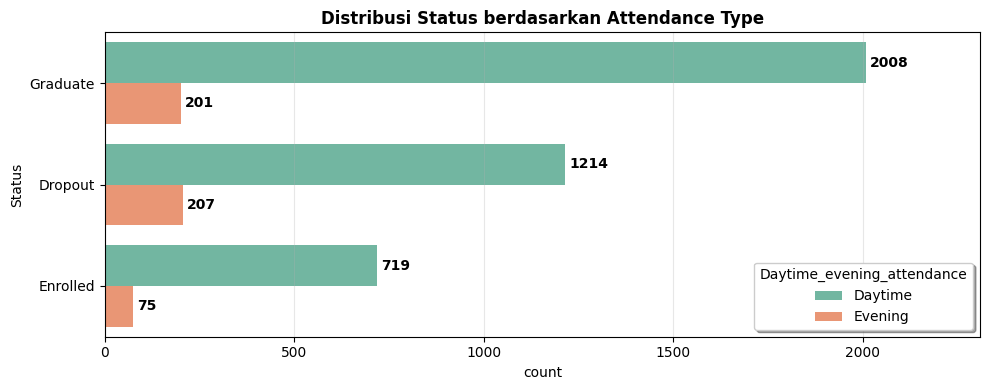

In [22]:
count_plot(df_eda, 'Status', 'Daytime_evening_attendance', 'Status berdasarkan Attendance Type', (10, 4), palette='Set2')

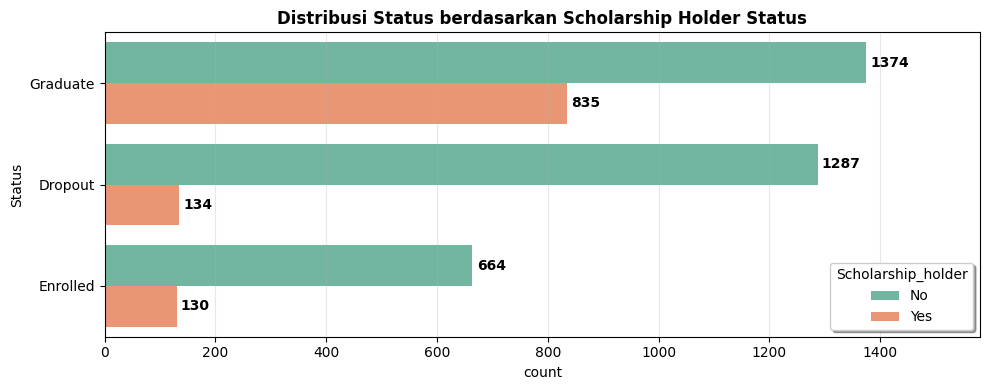

In [23]:
count_plot(df_eda, 'Status', 'Scholarship_holder', 'Status berdasarkan Scholarship Holder Status', (10, 4), palette='Set2')

In [24]:
def box_plot(data, x, y, hue=None, title=None, figsize=(8, 6), palette='Set2',
             show_outliers=True, add_stats=True):
    """
    Create an enhanced boxplot with customizable features for EDA.

    Parameters:
    - data: DataFrame, the dataset to plot.
    - x: str, the column for x-axis (categorical variable).
    - y: str, the column for y-axis (numerical variable).
    - hue: str, optional, the column for hue categorization.
    - title: str, optional, custom title. If None, auto-generated.
    - figsize: tuple, the size of the figure.
    - palette: str or list, color palette to use.
    - show_outliers: bool, whether to show outliers.
    - add_stats: bool, whether to add statistical annotations.

    Returns:
    - This function does not return any value but displays a boxplot.
    """
    plt.figure(figsize=figsize)

    if hue:
        n_categories = data[hue].nunique()
    else:
        n_categories = data[x].nunique()

    if palette == 'Set2':
        colors = sns.color_palette("Set2", n_colors=n_categories)
    elif isinstance(palette, list):
        colors = palette[:n_categories]
    else:
        colors = sns.color_palette(palette, n_colors=n_categories)

    if hue:
        ax = sns.boxplot(data=data, x=x, y=y, hue=hue,
                         palette=colors,
                         showfliers=show_outliers)
    else:
        ax = sns.boxplot(data=data, x=x, y=y, hue=x,
                         palette=colors,
                         showfliers=show_outliers,
                         legend=False)

    if title is None:
        if hue:
            title = f'Distribution of {y} by {x} and {hue}'
        else:
            title = f'Distribution of {y} by {x}'

    plt.title(title, fontweight='bold', fontsize=12, pad=20)
    plt.grid(axis='y', alpha=0.3, linestyle='--')

    plt.xlabel(x.replace('_', ' ').title(), fontweight='bold')
    plt.ylabel(y.replace('_', ' ').title(), fontweight='bold')

    if hue:
        plt.legend(title=hue.replace('_', ' ').title(),
                  loc='best', frameon=True, fancybox=True, shadow=True)

    if add_stats and not hue:
        medians = data.groupby(x)[y].median()
        for i, category in enumerate(data[x].unique()):
            median_val = medians[category]
            ax.text(i, median_val, f'Med: {median_val:.1f}',
                   ha='center', va='bottom', fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

    x_labels = [str(label) for label in data[x].unique()]
    max_label_length = max(len(label) for label in x_labels)

    if max_label_length > 8 or len(x_labels) > 5:
        plt.xticks(rotation=45, ha='right')
    else:
        plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()

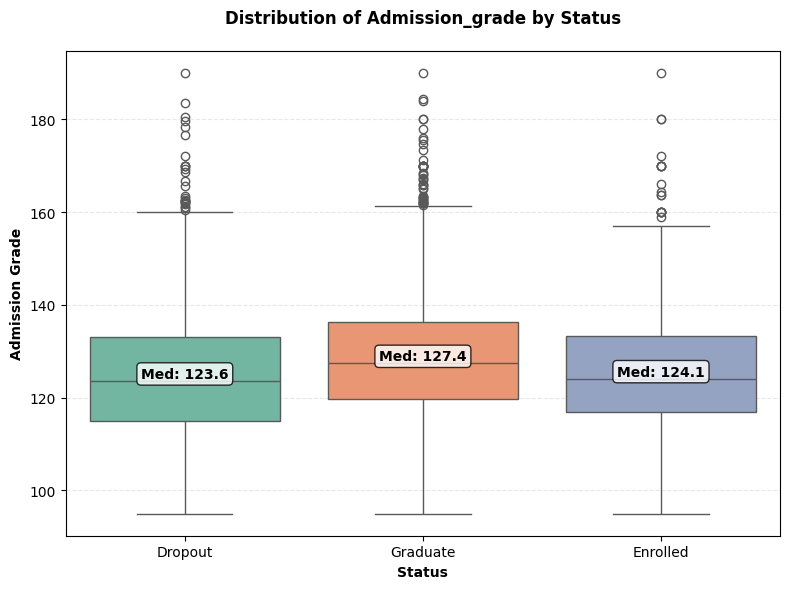

In [25]:
box_plot(df_eda, 'Status', 'Admission_grade', palette='Set2')

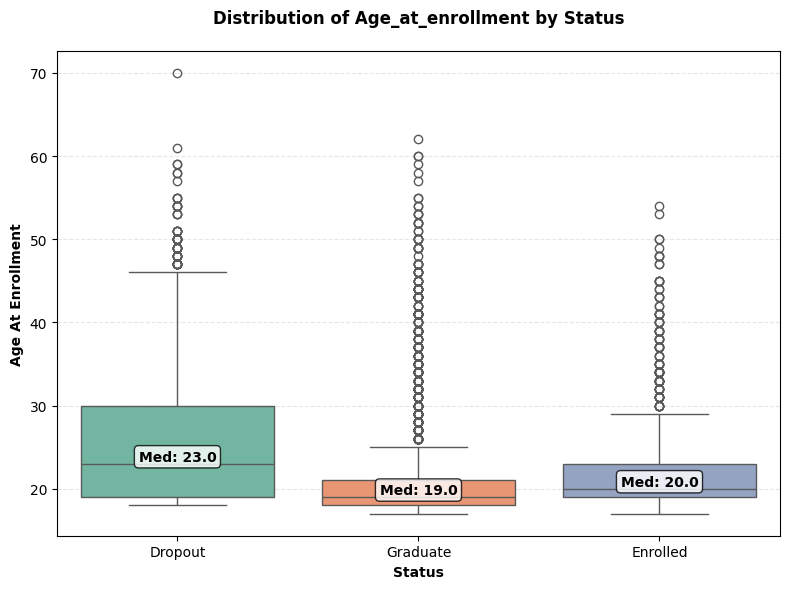

In [26]:
box_plot(df_eda, 'Status', 'Age_at_enrollment', palette='Set2')

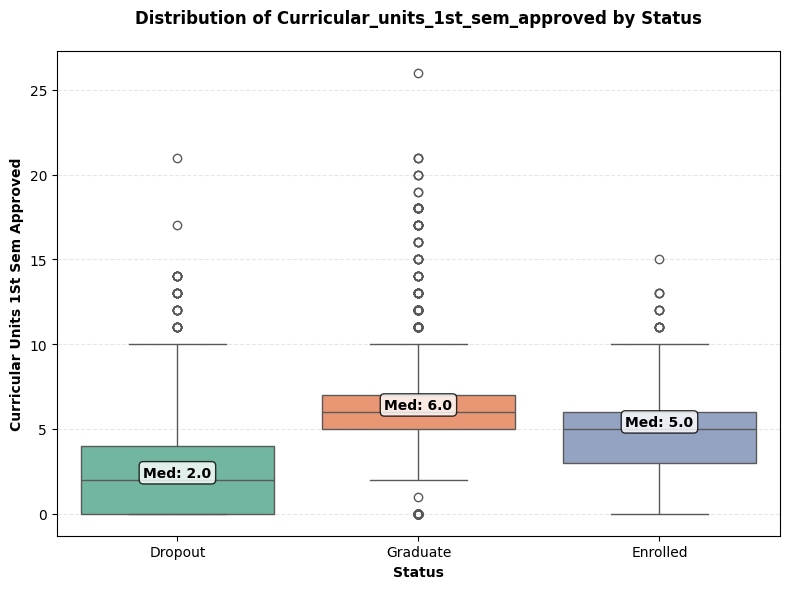

In [27]:
box_plot(df_eda, 'Status', 'Curricular_units_1st_sem_approved', palette='Set2')

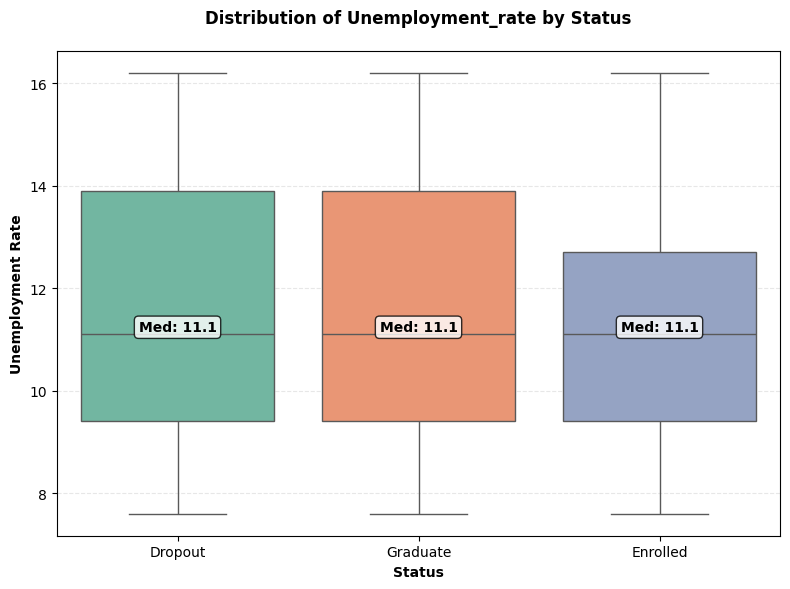

In [28]:
box_plot(df_eda, 'Status', 'Unemployment_rate', palette='Set2')

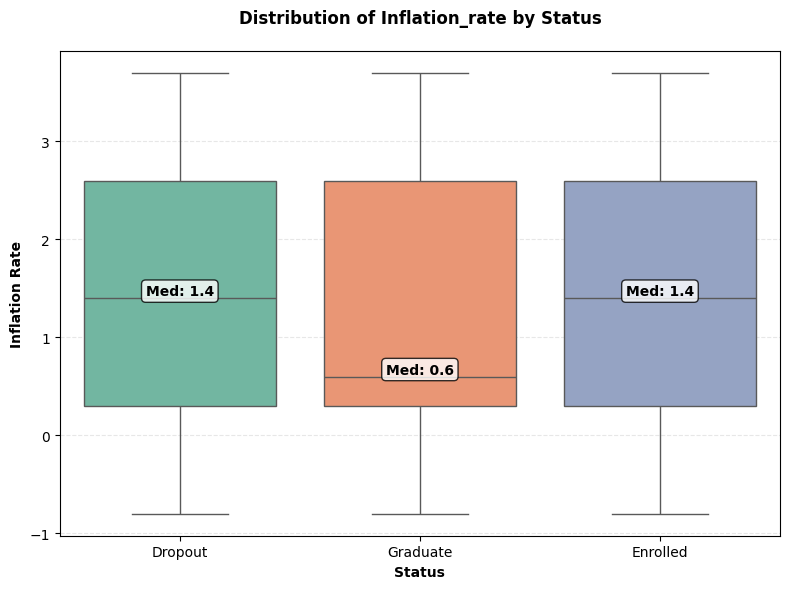

In [29]:
box_plot(df_eda, 'Status', 'Inflation_rate', palette='Set2')

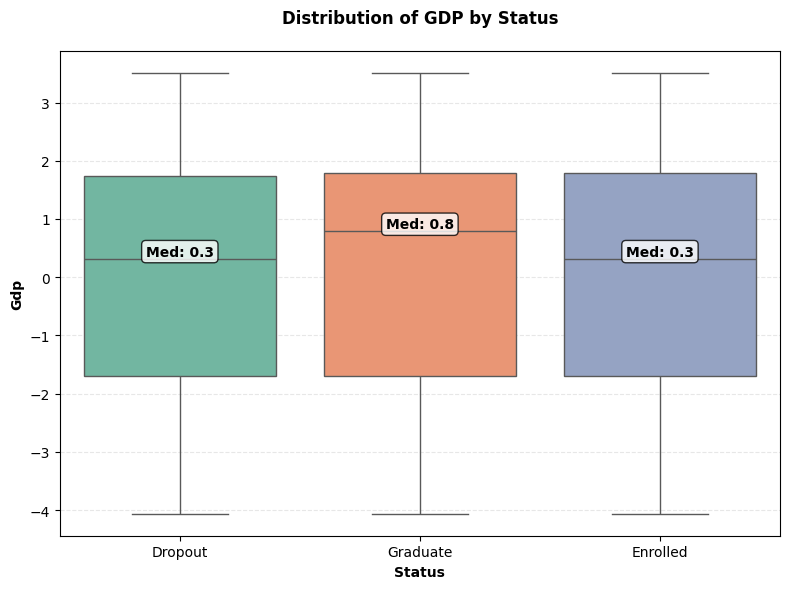

In [30]:
box_plot(df_eda, 'Status', 'GDP', palette='Set2')

# Data Preprocessing

In [31]:
# Labe
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])
le.classes_, le.transform(le.classes_)

(array(['Dropout', 'Enrolled', 'Graduate'], dtype=object), array([0, 1, 2]))

In [32]:
df = df[df['Status'] != 1]
df = df.reset_index(drop=True)

df.loc[:, 'Status'] = df['Status'].replace({2: 1})
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
3626,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
3627,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
3628,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [33]:
df_filtered = df.loc[:, df.corr()['Status'].abs().ge(0.1)]
df_filtered

,Marital_status,Application_mode,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,1,17,122.0,127.3,1,0,1,1,0,20,0,0,0.000000,0,0,0,0.000000,0,0
1,1,15,160.0,142.5,1,0,0,1,0,19,6,6,14.000000,6,6,6,13.666667,0,1
2,1,1,122.0,124.8,1,0,0,1,0,19,6,0,0.000000,6,0,0,0.000000,0,0
3,1,17,122.0,119.6,1,0,1,0,0,20,6,6,13.428571,6,10,5,12.400000,0,1
4,2,39,100.0,141.5,0,0,1,0,0,45,6,5,12.333333,6,6,6,13.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,125.0,122.2,0,0,1,1,0,19,6,5,13.600000,6,8,5,12.666667,0,1
3626,1,1,120.0,119.0,1,1,0,0,0,18,6,6,12.000000,6,6,2,11.000000,0,0
3627,1,1,154.0,149.5,1,0,1,0,1,30,7,7,14.912500,8,9,1,13.500000,0,0
3628,1,1,180.0,153.8,1,0,1,0,1,20,5,5,13.800000,5,6,5,12.000000,0,1


In [34]:
df_filtered.to_csv('data_filtered.csv', index=False)

In [35]:
X = df_filtered.drop(['Status'], axis=1)
y = df_filtered['Status']

In [36]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

y_counter = collections.Counter(y)
y_smote_counter = collections.Counter(y_smote)

df_comparison = pd.DataFrame({
    'None': y_counter,
    'SMOTE': y_smote_counter
})

df_comparison.loc['Total'] = [sum(y_counter.values()), sum(y_smote_counter.values())]
df_comparison

,None,SMOTE
0,1421,2209
1,2209,2209
Total,3630,4418


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling

In [39]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_train_rf = rf_model.predict(X_train)
y_test_rf = rf_model.predict(X_test)

RF - Testing Accuracy: 0.9095


Classification Report - Testing Set:
              precision    recall  f1-score   support

           0       0.94      0.87      0.91       442
           1       0.88      0.95      0.91       442

    accuracy                           0.91       884
   macro avg       0.91      0.91      0.91       884
weighted avg       0.91      0.91      0.91       884



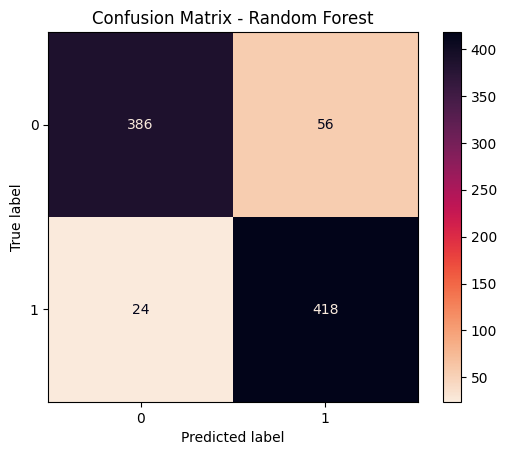

In [41]:
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

print(f"RF - Testing Accuracy: {accuracy_score(y_test, y_test_pred_rf):.4f}\n")
print("\nClassification Report - Testing Set:")
print(classification_report(y_test, y_test_pred_rf))

cm = confusion_matrix(y_test, y_test_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='rocket_r')
plt.title("Confusion Matrix - Random Forest")
plt.show()

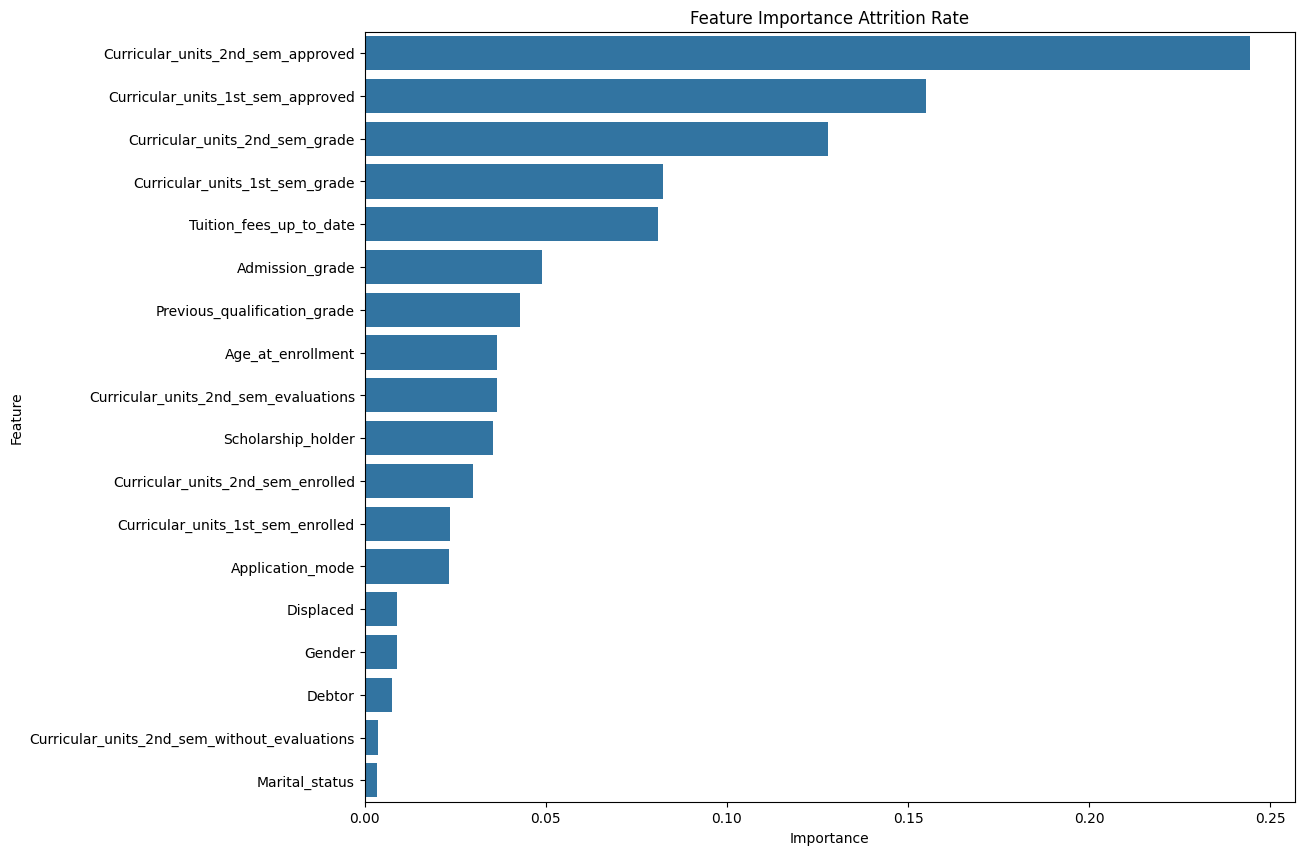

In [42]:
importances = rf_model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance Attrition Rate')
plt.show()

In [43]:
# Menyimpan model Random Forest dalam format .pkl
with open('rf_model.pkl', 'wb') as rf_model_file:
    pickle.dump(rf_model, rf_model_file)

In [44]:
def load_model(model_path='rf_model.pkl'):
    """Load the obesity classification model from a pickle file."""
    try:
        with open(model_path, 'rb') as f:
            model = pickle.load(f)
        print(f"Model loaded successfully from {model_path}")
        return model
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

model = load_model()

sample_data = {
    'Curricular_units_2nd_sem_approved': [10],
    'Curricular_units_1st_sem_approved': [6],
    'Curricular_units_2nd_sem_grade': [14.0],
    'Curricular_units_1st_sem_grade': [15.0],
    'Tuition_fees_up_to_date': [1],
    'Admission_grade': [140.0],
    'Previous_qualification_grade': [130.0],
    'Age_at_enrollment': [18],
    'Curricular_units_2nd_sem_evaluations': [6],
    'Scholarship_holder': [0],
    'Curricular_units_2nd_sem_enrolled': [6],
    'Curricular_units_1st_sem_enrolled': [6],
    'Application_mode': [1],
    'Displaced': [0],
    'Gender': [1],
    'Debtor': [0],
    'Curricular_units_2nd_sem_without_evaluations': [0],
    'Marital_status': [1]
}

new_data_df = pd.DataFrame(sample_data)

prediction_numeric = model.predict(new_data_df)
predicted_status = le.inverse_transform(prediction_numeric)

# Print the prediction result
print(f"Prediction result: {predicted_status}")

Model loaded successfully from rf_model.pkl
Prediction result: ['Enrolled']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
